# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [227]:
import numpy as np
import pandas as pd

data = pd.read_csv('spam_or_not_spam.csv')
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [228]:
data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

Text(0.5, 1.0, 'Рис. 1 - Колличество писем в каждой из групп')

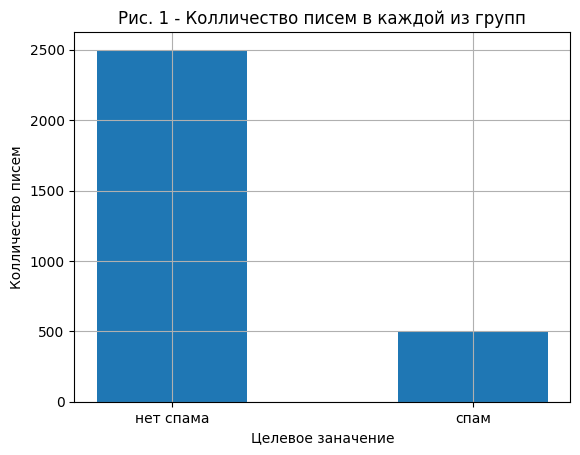

In [229]:
from matplotlib import pyplot as plt

plt.bar(["нет спама", "спам"], data['label'].value_counts(), width=0.5)
plt.grid()
plt.xlabel("Целевое заначение")
plt.ylabel("Колличество писем")
plt.title("Рис. 1 - Колличество писем в каждой из групп")

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [230]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [231]:
data['email'] = data['email'].replace(r'^\s*$', np.NaN, regex=True)
data.dropna(inplace=True)

Переводим данные в векторный вид:

In [232]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [233]:
print(f'Количество признаков - {X.shape[1]}')

Количество признаков - 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [234]:
y = data['label']
X = X.toarray()

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [236]:
print(f'{y_test.mean():.3f}')

0.177


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [237]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB


mnb_model = MultinomialNB(alpha=0.01)
cnb_model = ComplementNB(alpha=0.01)

mnb_model.fit(X_train, y_train)
cnb_model.fit(X_train, y_train)

mnb_model_predicted = mnb_model.predict(X_test)
cnb_model_predicted = cnb_model.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [238]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


nmb_accuracy = accuracy_score(y_test, mnb_model_predicted)
print(f"accuracy score of MultinomialNB-model {nmb_accuracy:.3f}")

nmb_precision = precision_score(y_test, mnb_model_predicted)
print(f"precision score of MultinomialNB-model {nmb_precision:.3f}")

nmb_recall = recall_score(y_test, mnb_model_predicted)
print(f"recall score of MultinomialNB-model {nmb_recall:.3f}")
print("-"*50)
cnb_accuracy = accuracy_score(y_test, cnb_model_predicted)
print(f"accuracy score of ComplementNB-model {cnb_accuracy:.3f}")

cnb_precision = precision_score(y_test, cnb_model_predicted)
print(f"precision score of ComplementNB-model {cnb_precision:.3f}")

cnb_recall = recall_score(y_test ,cnb_model_predicted)
print(f"recall score of ComplementNB-model {cnb_recall:.3f}")

accuracy score of MultinomialNB-model 0.991
precision score of MultinomialNB-model 0.977
recall score of MultinomialNB-model 0.970
--------------------------------------------------
accuracy score of ComplementNB-model 0.991
precision score of ComplementNB-model 0.977
recall score of ComplementNB-model 0.970


Нарисуйте ROC-кривую:

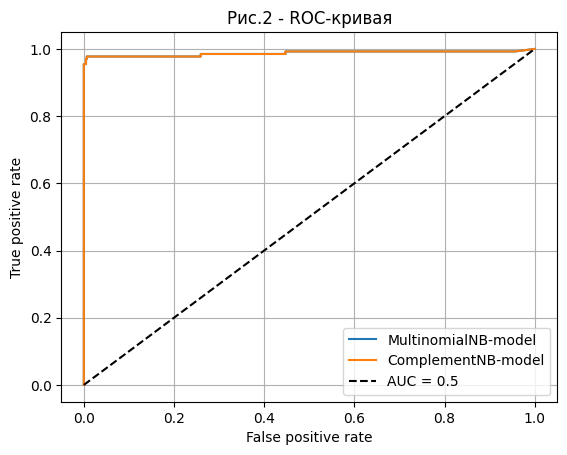

In [239]:
from sklearn.metrics import roc_curve

mnb_model_predicted_proba = mnb_model.predict_proba(X_test)
cnb_model_predicted_proba = cnb_model.predict_proba(X_test)

fpr_nmb, tpr_nmb, thresholds_nmb = roc_curve(y_test, mnb_model_predicted_proba[:, 1])
fpr_cnb, tpr_cnb, thresholds_cnb = roc_curve(y_test, cnb_model_predicted_proba[:, 1])

plt.plot(fpr_nmb, tpr_nmb, label='MultinomialNB-model')
plt.plot(fpr_cnb, tpr_cnb, label='ComplementNB-model')
plt.plot([0, 1], [0, 1], 'k--', label='AUC = 0.5')
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Рис.2 - ROC-кривая")
plt.legend()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [240]:
from sklearn.model_selection import GridSearchCV

params = {"alpha": np.linspace(0.01, 1)}
grid_search = GridSearchCV(mnb_model, params, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Лучшее значение метрики "accuracy" {grid_search.best_score_:.4f}')

Лучшее значение метрики "accuracy" 0.9920


Параметр alpha не влияет на качество модели